# <b>Task 2:</b> Time Series Analysis
<hr>

### <b>Firstly,</b> we import the previous notebook by running it. 

0     2016-01-03
1     2016-01-07
2     2016-01-07
3     2016-01-10
4     2016-01-10
         ...    
945   2019-12-15
946   2019-12-26
947   2019-12-27
948   2019-12-28
949   2019-12-29
Name: Date of Sale, Length: 950, dtype: datetime64[ns]
   Date of Sale     Price    Location  Year Built         Size  \
0    2016-01-03  638740.0  Brookville        2011  1,849 sq ft   
1    2016-01-07  546330.0  Brookville        2009  1,551 sq ft   
2    2016-01-07  527512.0  Brookville        2006  1,696 sq ft   
3    2016-01-10  376039.0    West End        1963  1,073 sq ft   
4    2016-01-10  576354.0    West End        2009  2,054 sq ft   
5    2016-01-12  453108.0    West End        2008  1,653 sq ft   
6    2016-01-12  499081.0    West End        2012  1,793 sq ft   
7    2016-01-16  352303.0    Oakbrook        1969  1,060 sq ft   
8    2016-01-20  705562.0  Brookville        2013  1,756 sq ft   
9    2016-01-20  369296.0  Brookville        1995    982 sq ft   
10   2016-01-20  356643.0  Brook

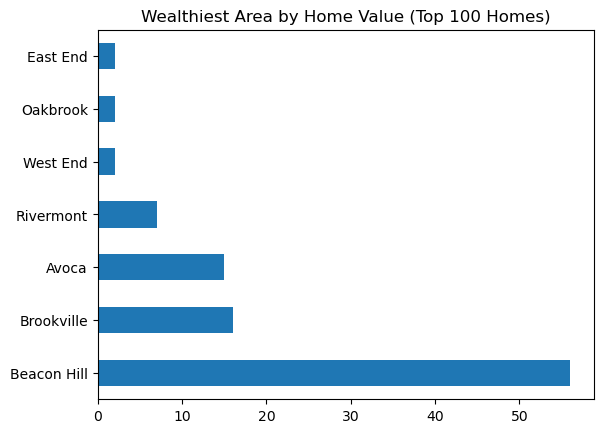

In [1]:
%run Task1.ipynb

### <b>Time Series #1: Total Number of House Sales</b>

### <b>Time Series #1:</b> Pt 1: Number of House Sales By Day
Create a Dataframe consisting of total sales per day. 

In [2]:
df_sales_per_day = pd.to_datetime(df['Date of Sale'])

df_sales_per_day_counts = df_sales_per_day.value_counts(sort=False)


2.2

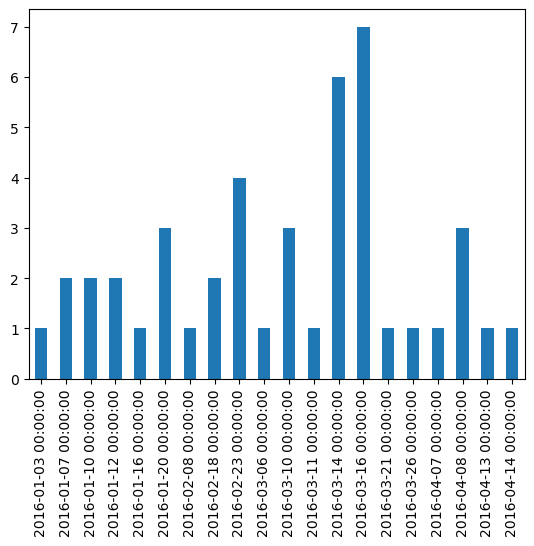

In [3]:
df_sales_per_day_counts.head(20).plot(kind="bar")
df_sales_per_day_counts.head(20).mean()

As we can see from the above plot of the first 20 days, the highest day of these 20 was March 16th, 2016. The average sales per day of this group is 2.2 sales per day. 

### <b>Time Series #1:</b> Pt 2: Number of House Sales By Month

Create a dataframe tallying the number of sales per month. 

In [4]:
df['month'] = pd.to_datetime(df['Date of Sale']).dt.to_period('M')

months = df['month'].value_counts(sort=False) #Sort has to be set to false as you want these values to be treated as dates still, not ranked based off highest sales per month

<AxesSubplot:title={'center':'Number of House Sales Per Month'}>

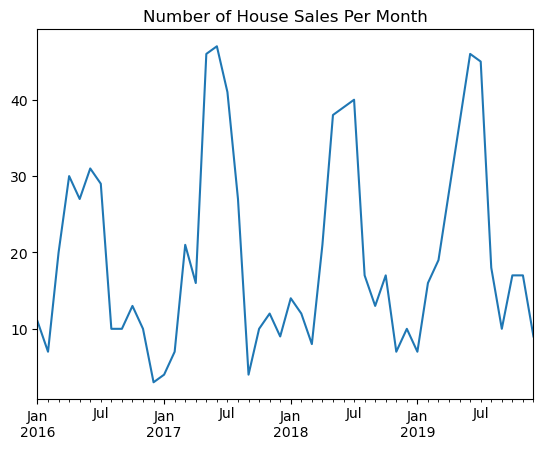

In [5]:
months.plot(title="Number of House Sales Per Month")

It is clear from this data that there is a spike each year of house sales during spring until the middle of the summer. 

### <b>Time Series #1:</b> Pt 3: Number of House Sales By Quarter

Create a dataframe counting the number of sales per quarter in each year. 

In [6]:
df['quarter'] = pd.to_datetime(df['Date of Sale']).dt.to_period('Q')

quarters = df['quarter'].value_counts(sort=False)

quarters

2016Q1     38
2016Q2     88
2016Q3     49
2016Q4     26
2017Q1     32
2017Q2    109
2017Q3     72
2017Q4     31
2018Q1     34
2018Q2     98
2018Q3     70
2018Q4     34
2019Q1     42
2019Q2    111
2019Q3     73
2019Q4     43
Freq: Q-DEC, Name: quarter, dtype: int64

<AxesSubplot:title={'center':'House Sales Quarterly'}>

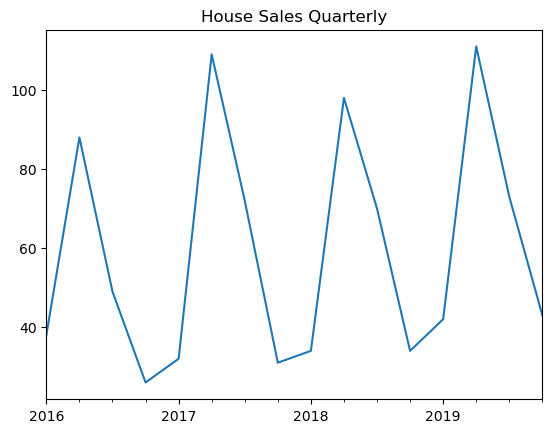

In [7]:
quarters.plot(title="House Sales Quarterly")

This quarterly plot shows a trend of sales rising in the spring, peaking in the summer and then a sharp drop until the cycle repeats. 

In [8]:
df_sales_per_day_counts.sort_values()

2016-01-03    1
2018-06-03    1
2018-06-01    1
2018-05-23    1
2018-05-21    1
             ..
2016-03-16    7
2017-07-30    7
2017-05-15    7
2019-03-22    7
2017-06-24    9
Name: Date of Sale, Length: 500, dtype: int64

### <b>Time Series #1:</b> Discussion

The Day with the Most Sales is: June 24th, 2017. 

We are given 950 individual house sales ranging from January 2016 to December 2019. In order to find the the number of house sales per day, we perform a value_counts operation on a dataframe of all the dates. This will tally together all days with sales, removing the duplicates and allowing us to visualize days with more than 1 sale. This greatly simplified the information given and allows us to grasp information sought, but we now need to identify the number of sales per month and then by quarter. Using the .to_period method, we can sort the dates by a frequency of months and quarters.

The major trend displayed from this data and the plots made from it, show that every year an influx of sales occurs beginning in the Spring, peaking in summer, and then dropping off until the cycle repeats. 


### <b>Time Series #2: Average Monthly House Prices</b>

In [9]:
df_price = df['Price']
df_dates = df['Date of Sale']

df_prices = pd.concat([df_dates, df_price], axis=1)

df_prices['month'] = df_prices['Date of Sale'].dt.to_period('M')


In [10]:
df_prices_by_month = df_prices.groupby(pd.PeriodIndex(df_prices['Date of Sale'], freq="M"))['Price'].mean()

df_prices_by_month.head()

Date of Sale
2016-01    490997.090909
2016-02    519013.285714
2016-03    485774.400000
2016-04    397597.000000
2016-05    370566.222222
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Date of Sale'>

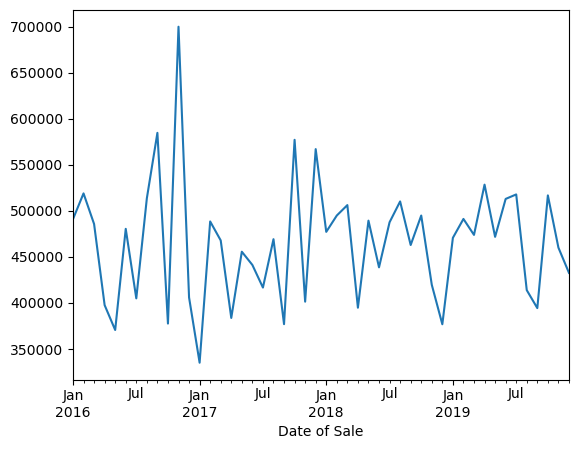

In [11]:
df_prices_by_month.plot()

This plot shows each monthly average of prices plotted for the entire dataset. 

### <b>Time Series #2:</b> Discussion

### <b>Time Series #3: Average Monthly Price by Location</b>

### <b>Time Series #3:</b> Pt 1: Average Monthly Price - Brookville

In [12]:
df_location = df['Location']

df_prices_locations = pd.concat([df_dates, df_price, df_location], axis=1)

df_prices_locations

,Date of Sale,Price,Location
0,2016-01-03,638740.0,Brookville
1,2016-01-07,546330.0,Brookville
2,2016-01-07,527512.0,Brookville
3,2016-01-10,376039.0,West End
4,2016-01-10,576354.0,West End
...,...,...,...
945,2019-12-15,511688.0,Beacon Hill
946,2019-12-26,468401.0,West End
947,2019-12-27,228647.0,Rivermont
948,2019-12-28,410983.0,Oakbrook


In [13]:
mask_brookville = df_prices_locations['Location'].isin(['Brookville'])

df_prices_brookville = df_prices_locations[mask_brookville]

df_prices_brookville

,Date of Sale,Price,Location
0,2016-01-03,638740.0,Brookville
1,2016-01-07,546330.0,Brookville
2,2016-01-07,527512.0,Brookville
8,2016-01-20,705562.0,Brookville
9,2016-01-20,369296.0,Brookville
...,...,...,...
906,2019-09-27,814855.0,Brookville
916,2019-10-18,371847.0,Brookville
922,2019-10-24,568641.0,Brookville
924,2019-11-01,709600.0,Brookville


In [14]:
df_monthly_brookville = df_prices_brookville.groupby(pd.PeriodIndex(df_prices_brookville['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_brookville

Date of Sale
2016-01    524013.833333
2016-02    564079.000000
2016-05    501000.200000
2016-06    536252.666667
2016-07    428108.000000
2016-08    614337.333333
2016-09    507556.250000
2016-10    580169.000000
2016-11    690562.000000
2017-01    311527.000000
2017-02    662763.000000
2017-03    450427.000000
2017-04    487060.666667
2017-05    557774.909091
2017-06    571763.500000
2017-07    735581.000000
2017-08    500486.428571
2017-09    427752.333333
2017-10    507879.500000
2017-11    406020.500000
2017-12    647456.000000
2018-01    439814.166667
2018-02    445413.200000
2018-03    495189.000000
2018-04    488028.750000
2018-05    489299.300000
2018-06    491110.666667
2018-07    502108.000000
2018-09    586869.714286
2018-10    440894.000000
2018-11    389868.000000
2018-12    594954.500000
2019-01    809951.000000
2019-02    534229.800000
2019-03    447354.750000
2019-04    490563.200000
2019-05    570611.142857
2019-06    497404.636364
2019-07    562859.000000
2019-08    4

<AxesSubplot:xlabel='Date of Sale'>

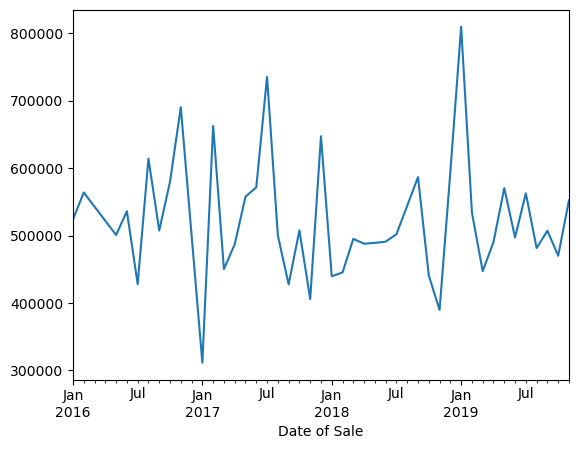

In [15]:
df_monthly_brookville.plot()

In [16]:
df_monthly_brookville.mean()

523274.6305698178

### <b>Time Series #3:</b> Pt 2: Average Monthly Price - West End

In [17]:
mask_westend = df_prices_locations['Location'].isin(['West End'])

df_prices_westend = df_prices_locations[mask_westend]

df_prices_westend

,Date of Sale,Price,Location
3,2016-01-10,376039.0,West End
4,2016-01-10,576354.0,West End
5,2016-01-12,453108.0,West End
6,2016-01-12,499081.0,West End
12,2016-02-18,617901.0,West End
...,...,...,...
868,2019-07-27,658956.0,West End
908,2019-10-04,1055392.0,West End
942,2019-12-02,489060.0,West End
946,2019-12-26,468401.0,West End


In [18]:
df_monthly_westend = df_prices_westend.groupby(pd.PeriodIndex(df_prices_westend['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_westend

Date of Sale
2016-01    4.761455e+05
2016-02    5.009870e+05
2016-04    4.302730e+05
2016-05    4.382520e+05
2016-06    5.110582e+05
2016-07    4.776819e+05
2016-10    4.684680e+05
2016-11    5.587265e+05
2017-05    4.739644e+05
2017-06    4.271330e+05
2017-07    6.285250e+05
2017-08    4.369338e+05
2017-12    4.406580e+05
2018-02    5.422160e+05
2018-04    5.118680e+05
2018-05    4.911710e+05
2018-06    4.632030e+05
2018-07    5.082426e+05
2018-08    4.604850e+05
2018-10    5.186930e+05
2019-03    4.631662e+05
2019-04    5.109388e+05
2019-05    5.035621e+05
2019-06    5.106234e+05
2019-07    5.296038e+05
2019-10    1.055392e+06
2019-12    4.964470e+05
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Date of Sale'>

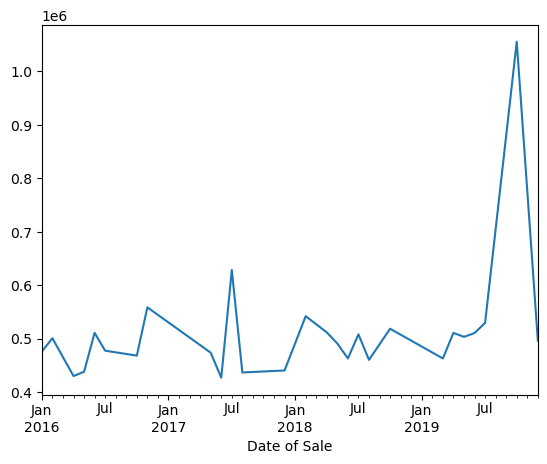

In [19]:
df_monthly_westend.plot()

In [20]:
df_monthly_westend.mean()

512385.85192533804

### <b>Time Series #3:</b> Pt 3: Average Monthly Price - Oakbrook

In [21]:
mask_oakbrook = df_prices_locations['Location'].isin(['Oakbrook'])

df_prices_oakbrook = df_prices_locations[mask_oakbrook]

df_prices_oakbrook

,Date of Sale,Price,Location
7,2016-01-16,352303.0,Oakbrook
18,2016-03-06,362078.0,Oakbrook
26,2016-03-14,370505.0,Oakbrook
27,2016-03-14,339483.0,Oakbrook
28,2016-03-14,410269.0,Oakbrook
...,...,...,...
926,2019-11-02,282977.0,Oakbrook
929,2019-11-06,292396.0,Oakbrook
930,2019-11-06,308163.0,Oakbrook
940,2019-11-28,314403.0,Oakbrook


In [22]:
df_monthly_oakbrook = df_prices_oakbrook.groupby(pd.PeriodIndex(df_prices_oakbrook['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_oakbrook

Date of Sale
2016-01    352303.000000
2016-03    382996.666667
2016-04    399608.666667
2016-05    366164.555556
2016-06    390658.666667
2016-07    337347.375000
2016-08    342747.000000
2016-10    347370.833333
2016-11    358069.000000
2016-12    405945.333333
2017-01    358424.500000
2017-02    449144.750000
2017-03    375243.800000
2017-04    387530.375000
2017-05    372777.000000
2017-06    383725.555556
2017-07    350643.050000
2017-08    354892.750000
2017-10    570528.500000
2017-11    306870.000000
2017-12    358895.000000
2018-01    401678.000000
2018-03    449215.000000
2018-04    363728.166667
2018-05    467308.142857
2018-06    397524.538462
2018-07    395125.818182
2018-08    350177.500000
2018-09    361830.000000
2018-10    377486.375000
2018-11    498212.500000
2018-12    376630.250000
2019-01    330703.000000
2019-02    400085.000000
2019-03    423777.000000
2019-04    337988.000000
2019-05    382250.833333
2019-06    354834.200000
2019-07    397285.076923
2019-08    3

<AxesSubplot:xlabel='Date of Sale'>

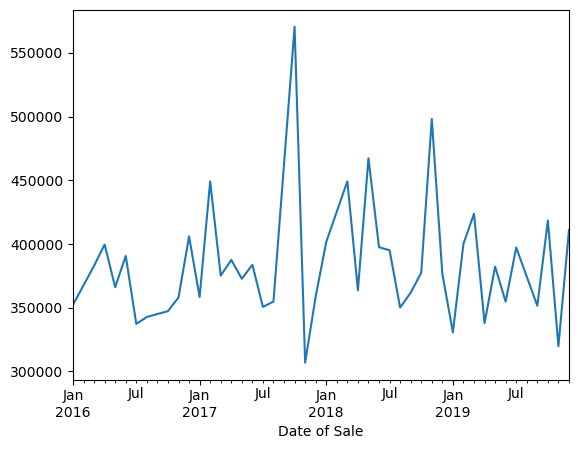

In [23]:
df_monthly_oakbrook.plot()

In [24]:
df_monthly_oakbrook.mean()

383931.59801215207

### <b>Time Series #3:</b> Pt 4: Average Monthly Price - Rivermont

In [25]:
mask_rivermont = df_prices_locations['Location'].isin(['Rivermont'])

df_prices_rivermont = df_prices_locations[mask_rivermont]

df_prices_rivermont

,Date of Sale,Price,Location
19,2016-03-10,125854.0,Rivermont
20,2016-03-10,272440.0,Rivermont
21,2016-03-10,344152.0,Rivermont
47,2016-04-20,353045.0,Rivermont
48,2016-04-20,412295.0,Rivermont
...,...,...,...
934,2019-11-11,267718.0,Rivermont
939,2019-11-27,440032.0,Rivermont
941,2019-12-02,292770.0,Rivermont
943,2019-12-13,272234.0,Rivermont


In [26]:
df_monthly_rivermont = df_prices_rivermont.groupby(pd.PeriodIndex(df_prices_rivermont['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_rivermont

Date of Sale
2016-03    247482.000000
2016-04    351611.000000
2016-05    299838.000000
2016-06    414858.875000
2016-07    325592.000000
2016-08    383637.000000
2016-10    355555.750000
2017-01    311639.000000
2017-03    254692.500000
2017-04    303967.500000
2017-05    313493.000000
2017-06    334662.750000
2017-07    349671.600000
2017-08    278267.166667
2017-09    224372.000000
2017-10    395698.000000
2017-11    406080.250000
2018-04    361906.750000
2018-05    483995.000000
2018-06    423622.000000
2018-07    897715.000000
2018-08    279835.333333
2018-10    420874.000000
2018-11    277614.500000
2018-12    267856.250000
2019-02    251268.000000
2019-04    299371.250000
2019-05    404444.200000
2019-06    324828.000000
2019-07    676576.333333
2019-08    347455.000000
2019-09    286545.000000
2019-10    264997.000000
2019-11    336721.250000
2019-12    264550.333333
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Date of Sale'>

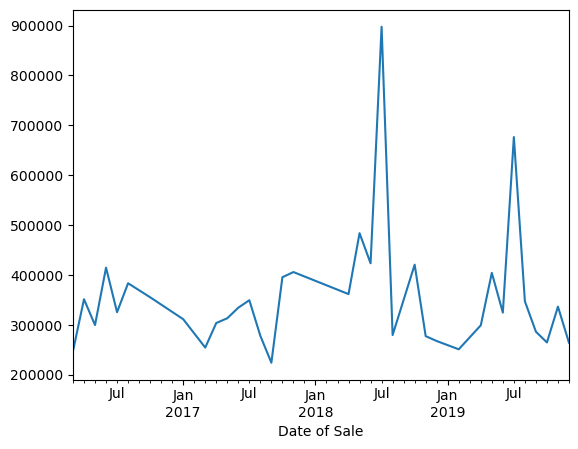

In [27]:
df_monthly_rivermont.plot()

In [28]:
df_monthly_rivermont.mean()

354894.1026190476

### <b>Time Series #3:</b> Pt 5: Average Monthly Price - Beacon Hill

In [29]:
mask_beaconhill = df_prices_locations['Location'].isin(['Beacon Hill'])

df_prices_beaconhill = df_prices_locations[mask_beaconhill]

df_prices_beaconhill

,Date of Sale,Price,Location
22,2016-03-11,900805.0,Beacon Hill
30,2016-03-16,450604.0,Beacon Hill
31,2016-03-16,750645.0,Beacon Hill
32,2016-03-16,928155.0,Beacon Hill
33,2016-03-16,924694.0,Beacon Hill
...,...,...,...
936,2019-11-19,897477.0,Beacon Hill
937,2019-11-19,727705.0,Beacon Hill
938,2019-11-19,859771.0,Beacon Hill
944,2019-12-15,688234.0,Beacon Hill


In [30]:
df_monthly_beaconhill = df_prices_beaconhill.groupby(pd.PeriodIndex(df_prices_beaconhill['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_beaconhill

Date of Sale
2016-03    7.736389e+05
2016-06    7.043826e+05
2016-08    1.044676e+06
2016-09    7.888400e+05
2016-11    1.109359e+06
2017-03    7.642130e+05
2017-05    7.792670e+05
2017-06    7.501800e+05
2017-08    6.780078e+05
2017-10    7.290318e+05
2018-03    1.161019e+06
2018-04    7.466220e+05
2018-07    8.271400e+05
2018-08    7.935183e+05
2018-10    7.974173e+05
2019-01    6.518340e+05
2019-02    6.607630e+05
2019-03    6.634880e+05
2019-04    9.012188e+05
2019-05    6.445407e+05
2019-06    8.755904e+05
2019-07    7.635861e+05
2019-08    5.201160e+05
2019-10    7.573425e+05
2019-11    8.283177e+05
2019-12    5.999610e+05
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Date of Sale'>

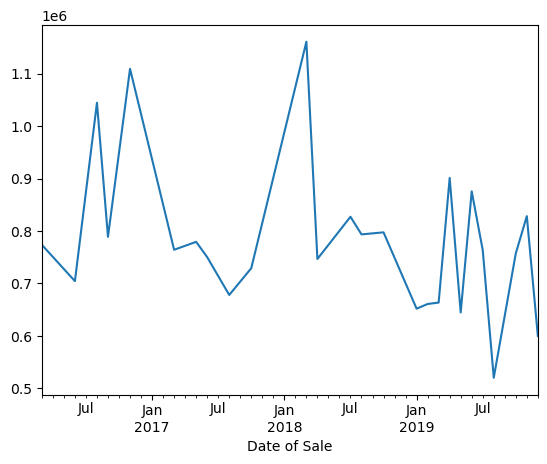

In [31]:
df_monthly_beaconhill.plot()

In [32]:
df_monthly_beaconhill.mean()

781310.4144855146

### <b>Time Series #3:</b> Pt 6: Average Monthly Price - East End

In [33]:
mask_eastend = df_prices_locations['Location'].isin(['East End'])

df_prices_eastend = df_prices_locations[mask_eastend]

df_prices_eastend

,Date of Sale,Price,Location
23,2016-03-14,265215.0,East End
24,2016-03-14,213894.0,East End
25,2016-03-14,295076.0,East End
38,2016-04-07,257253.0,East End
42,2016-04-13,232567.0,East End
...,...,...,...
896,2019-08-31,619238.0,East End
907,2019-10-01,265478.0,East End
909,2019-10-06,273780.0,East End
927,2019-11-05,327126.0,East End


In [34]:
df_monthly_eastend = df_prices_eastend.groupby(pd.PeriodIndex(df_prices_eastend['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_eastend

Date of Sale
2016-03    258061.666667
2016-04    327607.363636
2016-05    307359.000000
2016-06    321523.500000
2016-07    245367.000000
2016-08    379656.000000
2016-09    331269.000000
2016-10    353084.000000
2016-11    389750.000000
2017-02    480154.000000
2017-03    389285.250000
2017-04    361510.000000
2017-05    331587.111111
2017-06    431444.000000
2017-07    274634.000000
2017-10    303799.000000
2018-01    272452.000000
2018-03    290639.500000
2018-04    289978.600000
2018-05    360422.428571
2018-06    408527.800000
2018-07    360934.375000
2018-08    320285.000000
2018-09    309628.600000
2019-01    283607.000000
2019-02    539832.000000
2019-03    321125.500000
2019-04    328392.000000
2019-05    280317.750000
2019-06    330625.000000
2019-07    308738.777778
2019-08    361451.750000
2019-10    269629.000000
2019-11    285567.000000
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Date of Sale'>

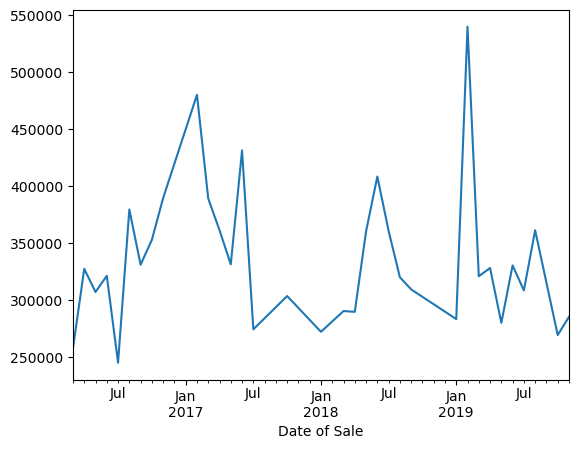

In [35]:
df_monthly_eastend.plot()

In [36]:
df_monthly_eastend.mean()

335536.6168459808

### <b>Time Series #3:</b> Pt 7: Average Monthly Price - Avoca

In [37]:
mask_avoca = df_prices_locations['Location'].isin(['Avoca'])

df_prices_avoca = df_prices_locations[mask_avoca]

df_prices_avoca

,Date of Sale,Price,Location
29,2016-03-16,485405.0,Avoca
39,2016-04-08,432317.0,Avoca
40,2016-04-08,463053.0,Avoca
41,2016-04-08,681028.0,Avoca
57,2016-04-26,624150.0,Avoca
...,...,...,...
914,2019-10-18,488347.0,Avoca
915,2019-10-18,551727.0,Avoca
919,2019-10-23,650209.0,Avoca
920,2019-10-23,688787.0,Avoca


In [38]:
df_monthly_avoca = df_prices_avoca.groupby(pd.PeriodIndex(df_prices_avoca['Date of Sale'], freq="M"))['Price'].mean()

df_monthly_avoca

Date of Sale
2016-03    485405.000000
2016-04    522798.142857
2016-06    392355.000000
2016-07    521849.000000
2017-03    638263.000000
2017-05    516185.333333
2017-06    520566.777778
2017-07    675637.000000
2017-08    808403.500000
2017-11    576192.500000
2017-12    643307.200000
2018-01    561341.500000
2018-02    521505.000000
2018-03    434229.000000
2018-05    624070.625000
2018-06    682077.500000
2018-07    606702.333333
2018-08    654615.400000
2018-10    662077.000000
2019-02    684863.000000
2019-03    453091.000000
2019-04    760219.000000
2019-05    528005.500000
2019-06    545761.200000
2019-10    594767.500000
2019-11    714137.000000
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Date of Sale'>

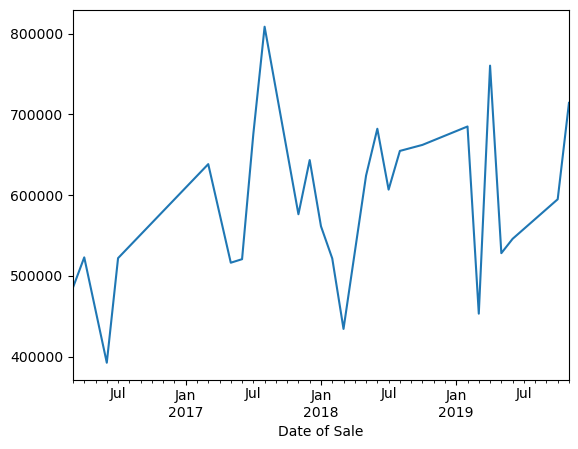

In [39]:
df_monthly_avoca.plot()

In [40]:
df_monthly_avoca.mean()

589554.8081654457

### <b>Time Series #3:</b> Plot of All Locations

Create Dataframe for All locations Means

In [41]:
city_list = ['Brookville', 'West End', 'Oakbrook', 'Rivermont', 'Beacon Hill', 'East End', 'Avoca']
city_means = []

city_means.append(int(df_monthly_brookville.mean()))
city_means.append(int(df_monthly_westend.mean()))
city_means.append(int(df_monthly_oakbrook.mean()))
city_means.append(int(df_monthly_rivermont.mean()))
city_means.append(int(df_monthly_beaconhill.mean()))
city_means.append(int(df_monthly_eastend.mean()))
city_means.append(int(df_monthly_avoca.mean()))

df_city_means = pd.DataFrame(
    {'Location': city_list,
     'Average Monthly Sale Price': city_means
    })

df_city_means.sort_values(by='Average Monthly Sale Price', ascending=False)

,Location,Average Monthly Sale Price
4,Beacon Hill,781310
6,Avoca,589554
0,Brookville,523274
1,West End,512385
2,Oakbrook,383931
3,Rivermont,354894
5,East End,335536


Bar Chart of All Location Means

<AxesSubplot:>

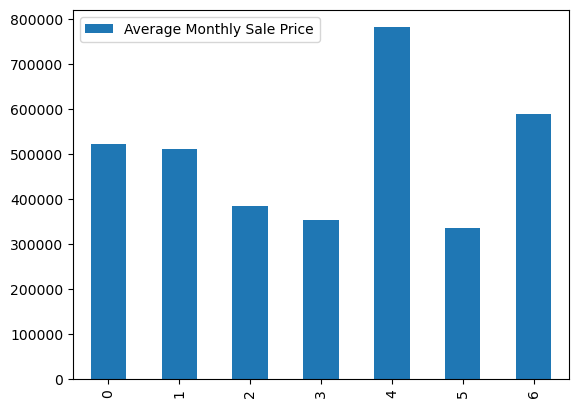

In [42]:
df_city_means.plot(kind="bar")

### <b>Time Series #3:</b> Discussion